# Section 10: Final Task
#### Infinite Square and Unsquare Well

Student number: 15019455

First we import the relevant modules.

In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image # needed to import a remote image later

## Introduction

In this code we will solve the time independant schrodinger equation (TISE) (shown below) under four different potentials which include:
1. Infinite Square-Well
2. Harmonic Potential
3. Finite Square-Well
4. Potential Step

The TISE equation is:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)$$

Key:
* $\hbar =  1.0546 \times 10^{34} J.s $ - reduced Plancks constant
* $m$ - particle mass
* $\psi$ - wavefunction
* $V(x)$ - potential energy
* $E$ - energy

We will solve the TISE by first guessing an energy $(E)$ for the particle (we will use an electron) and then using the fourth order Runge-Kutta method to solve the TISE with one boundary condition met, $\psi(-a) = 0$. Then after getting an initial solution for the TISE we will use the Secant method to find a solution that matches our other boundary condition of $\psi(a) = 0$. Finally we plot the wavefunction and compare with analytical solutions when possible.

We will do this all for different energy levels by guessing different initial energies for the particle.

In the below code-cell I have defined constants that will be used later in the code and also have set the initial values for $\psi$ and $\phi$ (defined later).

We will also define three regions with different potentials in the x-plane that will be present in all the following scenarios. These are shown by the following equation and graph. 

$$ V = \begin{cases} V(x) & \text{if } -a < x < +a, \\ 
\infty  & \text{if } |x| > a, \end{cases}$$

In [2]:
m = 9.1094 * 10**(-31) #electron mass in kg
hbar = 1.0546 * 10**(-34) #h bar in Js
e = 1.6022 * 10**(-19) #electron charge in C

a = 5 * 10**-11 #half the well width in m

N = 1000 #number of steps
h = (2*a)/N # size of Runge-Kutta steps
xpoints = np.arange(-a, a, h) 

psi0 = 0.0
phi0 = 1

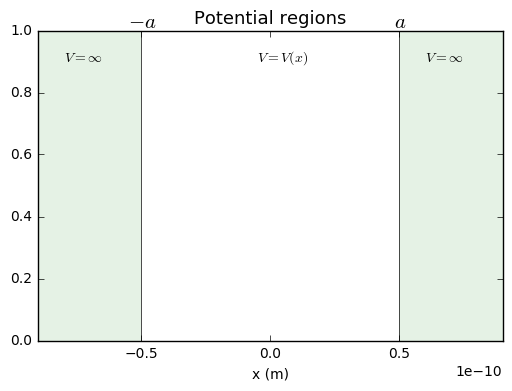

In [3]:
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y = 0
plt.xlabel("x (m)") 
plt.title("Potential regions" ,fontsize = 13)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

plt.xlim(-9*10**(-11),9*10**(-11))

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotation text
plt.text(-8*10**(-11),0.9,'$V = \infty$')
plt.text(-0.5*10**(-11),0.9,'$V = V(x)$')
plt.text(6*10**(-11),0.9,'$V = \infty$')
plt.text(-0.55*10**(-10),1.01,'$-a$', size = 15)
plt.text(0.48*10**(-10),1.01,'$a$', size = 15)

We have set these three regions because we know that in the $V=\infty$ regions the wavefunction will have have a value of zero and therefore we will not have to solve for the wavefunction in these regions. This will also mean that the wavefunction will be equal to zero at the region boundaries and since we know that wavefunctions must be continous this will set the boundary conditions for our solutions

## Fourth order Runge-Kutta method

We can use the fourth order Runge-Kutta method to solve second order differential equations (such as the TISE) by splitting the equation into two simultanous first order differentials as we have done below.

$$
\frac{d \psi}{dx } = \phi \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x)
$$

And then using the fourth order Runge-Kutta equations (shown below) to find a solution.

$$
k_1 = h f(r,x), \\
k_2 = h f(r+\frac{1}{2}k_1, x+\frac{1}{2}h), \\
k_3 = h f(r+\frac{1}{2}k_2, x+\frac{1}{2}h), \\
k_4 = h f(r+k_3, x+h), \\
r(x+h) = r(x) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$

where $r$ is a vector made of $\psi$ and $\phi$

# Secant Method

The Newton-Raphson method is used to find roots of equations by first taking a guess at the root and then finding a tangent to the the function at this point, then by calculating where this tangent crosses the x-axis we can find a better guess of the root. Then by repeating this we can converge on the root.

The Newton-Raphson equation is:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

However if you dont want to find the derivative of the function (as is required by the Newton-Raphson method) the you can use the Secant method which is an extension of the Newton-Raphson method and simply uses the below approximation:

$$
f'(x_2) \approx \frac{f(x_2) - f(x_1)}{x_2 - x_1}
$$

The equation for the Secant method is:
$$ 
x_3 = x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)},
$$

# 1. Infinite Square-Well

We start off by defining the potential for the infinite square well and do this by defining the potential function such that it returns zero for all x.

In [4]:
def V(x): 
    '''Potential energy function for infinite square well which returns a value of zero for all x'''
    
    return 0.0

The potential for the infinite square-well can be seen in the following graph.

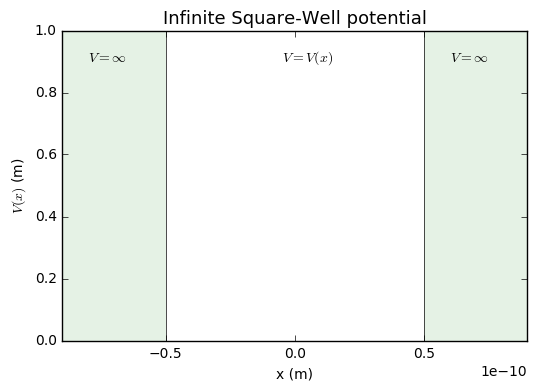

In [5]:
plt.axhline(c="k",ls=":", lw=0.5) # draw black dotted line at y = 0
plt.xlabel("x (m)") 
plt.ylabel("$V(x)$ (m)") 
plt.title("Infinite Square-Well potential" ,fontsize = 13)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

plt.xlim(-9*10**(-11),9*10**(-11))

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotation text
plt.text(-8*10**(-11),0.9,'$V = \infty$')
plt.text(-0.5*10**(-11),0.9,'$V = V(x)$')
plt.text(6*10**(-11),0.9,'$V = \infty$')

In order to solve the TISE we define the two equations for $\psi$ and $\phi$ in the code-cell below.

In [6]:
def f(r,x,E): 
    '''function for TISE simultaneous equations. 
    Inputs: 
    r - vector depending on phi and psi
    x - position of particle 
    E - energy of the particle
    
    Outputs:
    Both first order differential equations'''
    
    psi = r[0]
    phi = r[1] 
    
    fpsi = phi 
    fphi = 2*m/(hbar**2) * (V(x) - E) * psi
    
    return np.array([fpsi,fphi]) 

We then define a function for the fourth-order Runge-Kutta method.

In [7]:
def RungeKutta2d(r,xpoints,E):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is psi, second phi
            xpoints: array of x values.
    Outputs: [psipoints, phipoints]: solutions for psi and phi, numpy arrays one longer than xpoints'''
    
    #initialise empty arrays
    psipoints = [] 
    phipoints = []
    
    for x in xpoints: # loops over all xpoints up to (a-h)
        psipoints.append(r[0])
        phipoints.append(r[1])
        
        #fourth-order Runge Kutta equations
        k1 = h*f(r,x,E) 
        k2 = h*f(r+0.5*k1, x+0.5*h,E)
        k3 = h*f(r+0.5*k2, x+0.5*h,E)
        k4 = h*f(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
        
    # these next two lines calculate for the point at x = a
    psipoints.append(r[0])
    phipoints.append(r[1])
    
    return np.array([psipoints, phipoints]) # convert output to numpy array with 2 rows and N+1 columns

I have also defined a function for the Secant method in the below code-cell.

In [8]:
def Secant(E1,E2,tolerance):
    """Secant method function
    Inputs: E1 and E2: particle energy guesses in Joules
            tolerance: tolerance of the loop below
    Outputs: E3: Calculated particle energy from Secant method in Joules"""
    
    #initial guesses for psi calculated using fourth order Runge-Kutta function
    psiN1 = RungeKutta2d([psi0,phi0],xpoints,E1)[0,N]
    psiN2 = RungeKutta2d([psi0,phi0],xpoints,E2)[0,N]

    #error variable initial value
    err = 1
    
    #While loop for secant method iterations
    while err > tolerance:
        E3 = E2 - psiN2*(E2-E1)/(psiN2-psiN1)
        err = abs(psiN2-psiN1) 
        
        #resets E1 and E2 values for next iteration
        E1 = E2 
        E2 = E3 
        
        #resets psi guesses
        psiN1 = RungeKutta2d([psi0, phi0],xpoints,E1)[0,N]
        psiN2 = RungeKutta2d([psi0, phi0],xpoints,E2)[0,N]

    return(E3)

### 1.a n = 1 energy level

We start by finding the solution for the $n = 1$ energy level by using the above defined functions.

For the infinite square well we know the values of the energies from the following equation and so compare the two values.

Energies:
$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$
where $n$ represents the energy levels.

In [9]:
#energy guesses
E1_1 = 0.0
E2_1 = 10**(-19)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_1 = Secant(E1_1,E2_1,tolerance)

#energy level
n = 1

#prints energy values for numerical and analytical solution in eV.
print("The numerical solution for E at n=1:",E3_1/e,"eV") 
print("The analytical solution for E at n=1:",(np.pi*hbar*n)**2/(8*m*a**2*e),"eV") 


The numerical solution for E at n=1: 37.6044103908 eV
The analytical solution for E at n=1: 37.60441039077786 eV


Now we will plot the wavefunction for the $n = 1$ energy state. However before we do so we need to define a new array (`xplotpoints`) for x points because the Runge-Kutta xpoints array has `N` values for $\psi$ whereas the solution has `N+1` points.

(-9e-11, 9e-11)

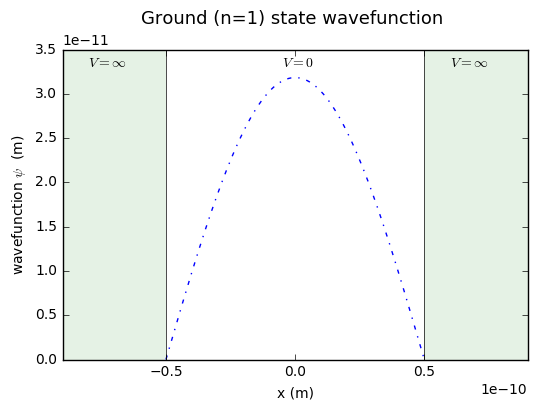

In [10]:
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point

bestsol = RungeKutta2d([psi0, phi0],xpoints,E3_1)  # call this with the *calculation* xpoints array

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsol[0], 'b-.')

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Ground (n=1) state wavefunction " ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),3.3e-11,'$V = \infty$')
plt.text(-0.5*10**(-11),3.3e-11,'$V = 0$')
plt.text(6*10**(-11),3.3e-11,'$V = \infty$')

plt.xlim(-9*10**(-11),9*10**(-11))

This is the wavefunction for the $n = 1$ energy and is not yet normalised.

We know the analytical solution for $\psi$ inside the infinite square-well and so below I have defined a function for the wavefunction.

$\psi$ solution inside the infinite square-well:
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}
$$

$$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.
$$

In [11]:
def analyticalpsi(x,n):
    """analytical solution for psi in infinite square-well"""
    
    #if statements for either even or odd n
    if (-1)**n == 1:
        return np.sin((n*np.pi*x)/(2*a))/np.sqrt(a)
    if (-1)**n == -1:
        return np.cos((n*np.pi*x)/(2*a))/np.sqrt(a)

In order get a normalised wavefunction we need to integrate, and one way to do this is to use the trapezium rule (this is very easy as the function is already an array).

We need the following condition:
$$
\int | \psi(x) |^2 {\rm d} x = 1
$$

Trapezium rule:
$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{N-1}f(x + kh) \right]
$$

(-9e-11, 9e-11)

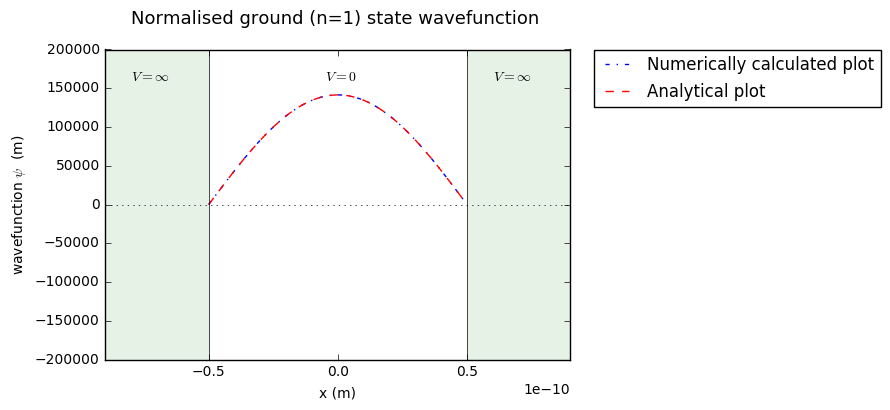

In [12]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_1)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#y points for analytical solution of psi
y = analyticalpsi(xpoints,n)

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_1)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

#plots analytical solution
plt.plot(xpoints,y,'r--',label="Analytical plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised ground (n=1) state wavefunction " ,fontsize = 13, y=1.06)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

The solution for an infinite well has a sinusoidal shape, as expected.

As you can see the normalised numerically calculated and analytical plot match up perfectly. This suggests that the Runge-Kutta method combined with the Secant method is an effective way of finding the wavefunctions. Also the methods are relatively quick and only require a relatively small amount of iterations and so therefore this method is also efficient.

Now we will use the same method as above for the $n = 1$ state wavefunction to work out wavefunctions at higher energy states at $n = 2,3,4$ and $20$. This is done by choosing different guesses for the initial energies `E1` and `E2`.

We guess `E1` and `E2` by looking at the analytical values and selecting values for the energy around them.

### 1.b n = 2 energy level

In [13]:
#energy guesses
E1_2 = 2.2*10**(-17)
E2_2 = 2.3*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_2 = Secant(E1_2,E2_2,tolerance)

#energy level
n = 2

#prints energy values for numerical and analytical solution in eV.
print("The numerical solution for E at n=2:",E3_2/e,"eV") 
print("The analytical solution for E at n=2:",(np.pi*hbar*n)**2/(8*m*a**2*e),"eV") 


The numerical solution for E at n=2: 150.417641567 eV
The analytical solution for E at n=2: 150.41764156311143 eV


(-9e-11, 9e-11)

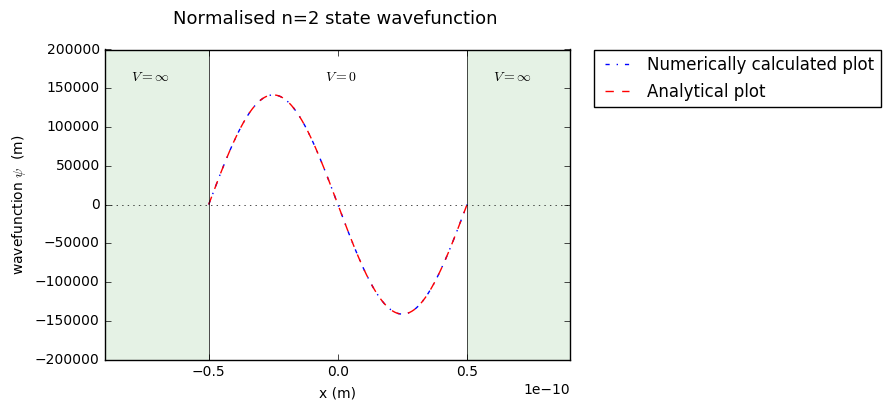

In [14]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_2)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#y points for analytical solution of psi
y = analyticalpsi(xpoints,n)

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_2)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

#plots analytical solution
plt.plot(xpoints,-y,'r--',label="Analytical plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=2 state wavefunction " ,fontsize = 13, y=1.06)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

### 1.c n = 3 energy level

In [15]:
#energy guesses
E1_3 = 5.3*10**(-17)
E2_3 = 5.4*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_3 = Secant(E1_3,E2_3,tolerance)

#energy level
n = 3

#prints energy values for numerical and analytical solution in eV.
print("The numerical solution for E at n=3:",E3_3/e,"eV") 
print("The analytical solution for E at n=3:",(np.pi*hbar*n)**2/(8*m*a**2*e),"eV") 

The numerical solution for E at n=3: 338.439693562 eV
The analytical solution for E at n=3: 338.43969351700076 eV


(-9e-11, 9e-11)

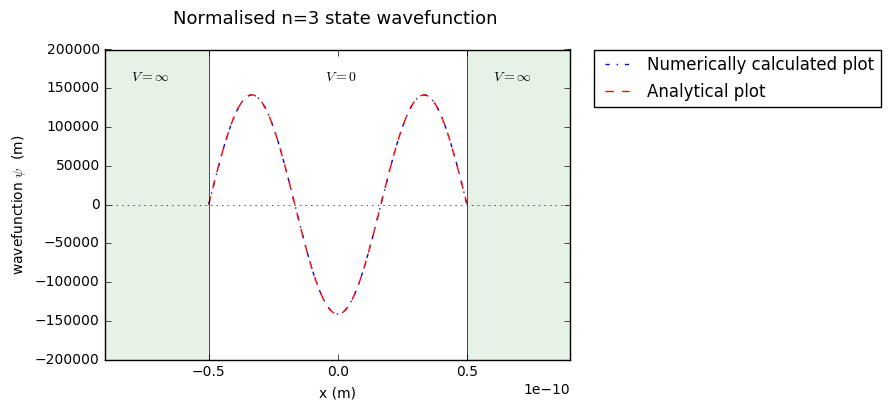

In [16]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_3)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#y points for analytical solution of psi
y = analyticalpsi(xpoints,n)

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_3)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

#plots analytical solution
plt.plot(xpoints,-y,'r--',label="Analytical plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=3 state wavefunction " ,fontsize = 13, y=1.06)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

### 1.d n = 4 energy level

In [17]:
#energy guesses
E1_4 = 9.3*10**(-17)
E2_4 = 9.4*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_4 = Secant(E1_4,E2_4,tolerance)

#energy level
n = 4

#prints energy values for numerical and analytical solution in eV.
print("The numerical solution for E at n=4:",E3_4/e,"eV") 
print("The analytical solution for E at n=4:",(np.pi*hbar*n)**2/(8*m*a**2*e),"eV") 

The numerical solution for E at n=4: 601.670566502 eV
The analytical solution for E at n=4: 601.6705662524457 eV


(-9e-11, 9e-11)

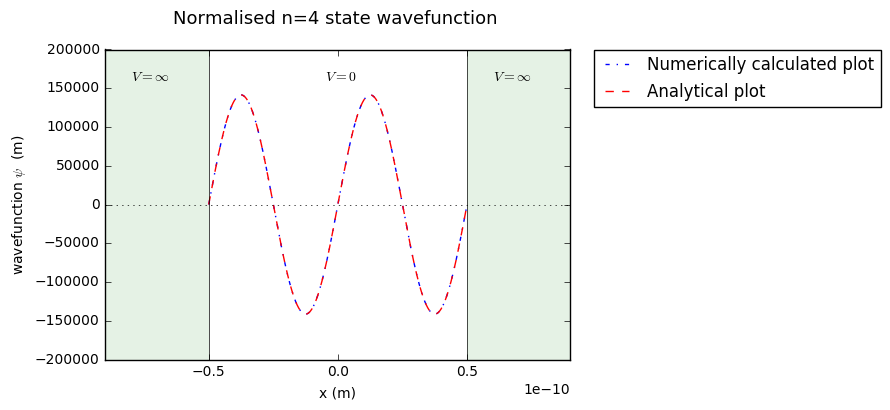

In [18]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_4)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#y points for analytical solution of psi
y = analyticalpsi(xpoints,n)

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_4)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

#plots analytical solution
plt.plot(xpoints,y,'r--',label="Analytical plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=4 state wavefunction " ,fontsize = 13, y=1.06)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

As you can see from energy states $n=2,3$ and $4$, the analytical and numerical plots match up exactly and therefore the method also works for higher energy states.
Also from the graphs you can see for each increase in energy state wavelength of the wavefunction decreases. You may also note that the number of peaks matches the energy state level, i.e $n = 2$ would have $2$ sinusoidal peaks.

Now we are going to try this method for a higher energy state $(n=20)$ and see if the method is still effective.

### 1.e n = 20 energy level

In [19]:
#energy guesses
E1_20 = 2.3*10**(-15)
E2_20 = 2.4*10**(-15)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_20 = Secant(E1_20,E2_20,tolerance)

#energy level
n = 20

#prints energy values for numerical and analytical solution in eV.
print("The numerical solution for E at n=20:",E3_20/e,"eV") 
print("The analytical solution for E at n=20:",(np.pi*hbar*n)**2/(8*m*a**2*e),"eV") 

The numerical solution for E at n=20: 15041.768058 eV
The analytical solution for E at n=20: 15041.764156311145 eV


(-9e-11, 9e-11)

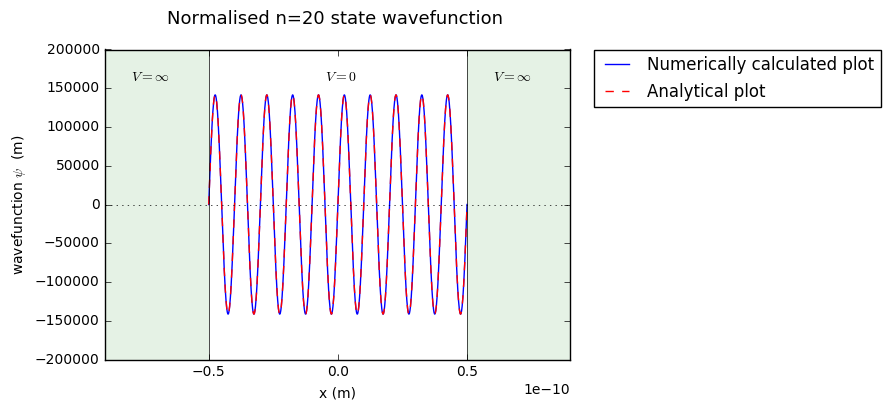

In [20]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_20)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#y points for analytical solution of psi
y = analyticalpsi(xpoints,n)

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_20)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-',label="Numerically calculated plot")

#plots analytical solution
plt.plot(xpoints,y,'r--',label="Analytical plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=20 state wavefunction " ,fontsize = 13, y=1.06)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

From the graph you can see that the function does actually work well for higher energy states because once again the analytical and numerical plot match up very well.

We did this method for an infinite square-well for which we have an analytical solution to compare with. This was done to ensure that our method works and can be used for potentials which don't have an analytical solution, such as a harmonic potential, which we will do next.

# 2. Harmonic Square-Well

Now we are going to change the potential between $-a$ and $a$ to a harmonic potential which has equation:

$$
V(x) = V_0 \frac{x^2}{a^2}
$$

where we set $V_0$ at $800e$ in the following function defined for the harmonic potential.

In [21]:
def V(x):
    '''Potential energy function for harmonic potential with V_0 set to 800e'''
    V0 = 800*e
    return V0*(x/a)**2

### 2.a n = 1 energy level

We are going to find numerical solutions for energy states $n = 1,2,3$ and $4$. And this time we dont have an analytical solution to compare with, this means we are simply going to have to guess the initial energies `E1` and `E2` and use our previous knowledge to decide from the graph which energy state the wavefunction has been solved for.

In [22]:
#energy guesses
E1_1 = 0
E2_1 = 10**(-19)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_1 = Secant(E1_1,E2_1,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=1:",E3_1/e,"eV") 

The numerical solution for E at n=1: 110.859610622 eV


(-9e-11, 9e-11)

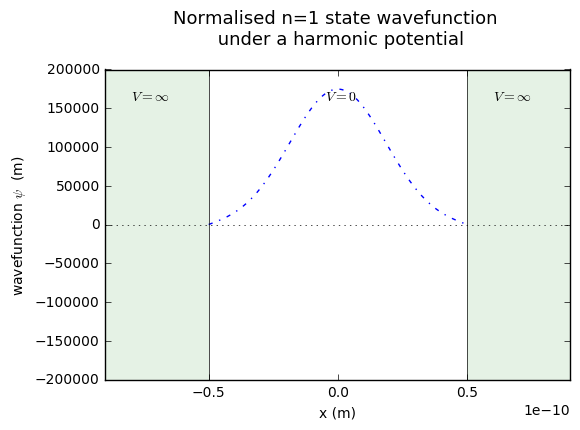

In [23]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_1)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_1)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=1 state wavefunction \n under a harmonic potential" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

This time the wavefunction does not have a sinusoidal shape as it did for the infinite square-well. The harmonic potential gives a more bell-curve kinda shape, which you would expect because the potential is higher near the edges (nearer to $a$ and $-a$) and therefore there is less chance of the particle existing at these points and therefore the wavefunction is lower at these areas.

### 2.b n = 2 energy level

In [24]:
#energy guesses
E1_2 = 5.5*10**(-17)
E2_2 = 5.6*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_2 = Secant(E1_2,E2_2,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=2:",E3_2/e,"eV") 

The numerical solution for E at n=2: 336.610856785 eV


(-9e-11, 9e-11)

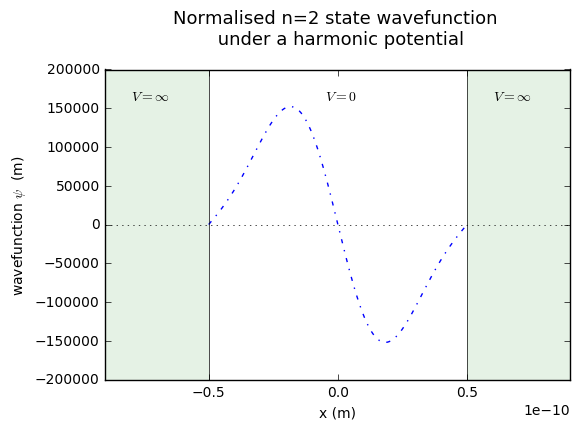

In [25]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_2)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_2)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=2 state wavefunction \n under a harmonic potential" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

### 2.c n = 3 energy level

In [26]:
#energy guesses
E1_3 = 9.5*10**(-17)
E2_3 = 9.6*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_3 = Secant(E1_3,E2_3,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=3:",E3_3/e,"eV") 

The numerical solution for E at n=3: 580.477674494 eV


(-9e-11, 9e-11)

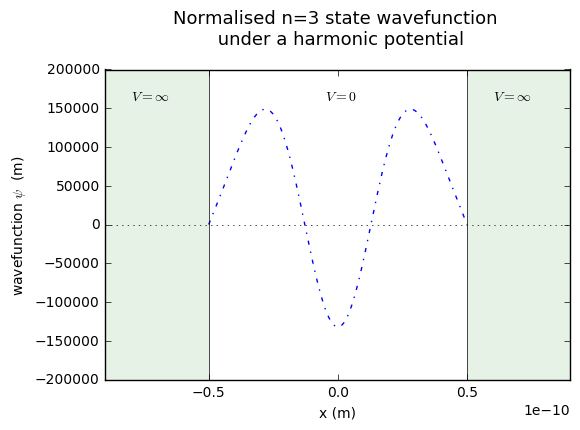

In [27]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_3)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_3)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=3 state wavefunction \n under a harmonic potential" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

### 2.d n = 4 energy level

In [28]:
#energy guesses
E1_4 = 1.5*10**(-16)
E2_4 = 1.6*10**(-16)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_4 = Secant(E1_4,E2_4,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=4:",E3_4/e,"eV") 

The numerical solution for E at n=4: 864.728367591 eV


(-9e-11, 9e-11)

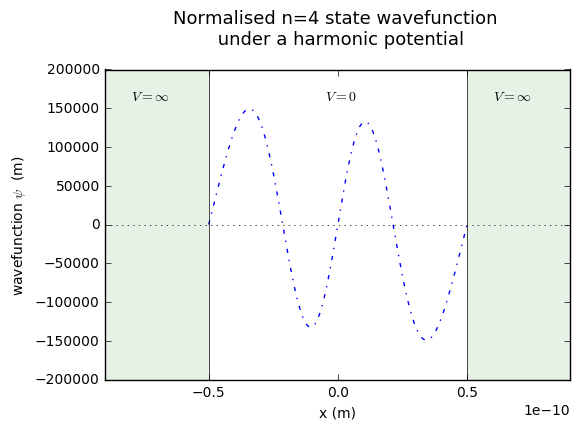

In [29]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_4)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_4)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=4 state wavefunction \n under a harmonic potential" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),160000,'$V = \infty$')
plt.text(-0.5*10**(-11),160000,'$V = 0$')
plt.text(6*10**(-11),160000,'$V = \infty$')

#x and y graph limits
plt.ylim(-200000,200000)
plt.xlim(-9*10**(-11),9*10**(-11))

For all the above energy states in a harmonic potential the wavefunctions appears as expected from previous knowledge.

Below I am going to plot the harmonic potential and energy values $n = 1,2,3$ and $4$.

(-9e-11, 9e-11)

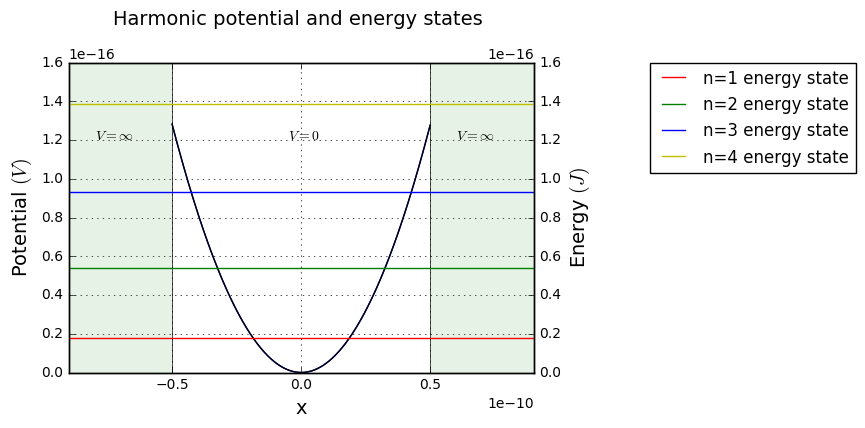

In [30]:
#Before plotting the wavefunction, we need to create a loop to run the harmonic potential function for the xpoints:
V0points=np.zeros(N) #create an array of zeros.

for q in range(0,N): #run loop to calculate the potentials for xpoints. 
    
    V0points[q]=V(xpoints[q])


plt.plot(xpoints,V0points) #Plot the harmonic potential within the barriers.

#Draw the barriers :
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

plt.xlabel("x (m)")
plt.ylabel("V (m)")

ax = plt.gca()
ax2 = ax.twinx()
plt.axis('normal')

##Plotting the n=1,2,3 energy eigenstates for the harmonic potential system:
ax2.axhline(y=E3_1, c='r', label="n=1 energy state") #Red line represents the energy value of the n=1 state.
ax2.axhline(y=E3_2, c='g', label="n=2 energy state") #Green line represents the energy value of the n=2 state.
ax2.axhline(y=E3_3, c='b', label="n=3 energy state") #Blue line represents the energy value of the n=3 state.
ax2.axhline(y=E3_4, c='y', label="n=4 energy state") #Yellow line represents the energy value of the n=4 state.

ax.plot(xpoints,V0points, 'k', label="harmonic potential") #Plot the harmonic potential as a black line.
ax.set_ylabel("Potential $(V)$",fontsize=14)
ax2.set_ylabel("Energy $(J)$",fontsize=14)

ax2.set_ylim(0,1.6e-16)
ax.set_ylim(0,1.6e-16)

ax.grid(True)
plt.title("Harmonic potential and energy states ", fontsize=14,color='black', y=1.1)
ax.set_xlabel('x', fontsize=14)
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),1.2e-16,'$V = \infty$')
plt.text(-0.5*10**(-11),1.2e-16,'$V = 0$')
plt.text(6*10**(-11),1.2e-16,'$V = \infty$')

#x and y graph limits
plt.xlim(-9*10**(-11),9*10**(-11))

As you can see the energy states increase in equal increments as is a property of the harmonic potential well. Also you can see that the $n=4$ energy level is actually higher than the potential well between $-a$ and $a$, This means that the particle has overcome the potential in this range.

# 3. Finite Square-Well

Now we will solve the TISE for a finite square-well, which is the same as the inifinite square well except that instead of having a potential of $V=\infty$ it has a finite potential. 

Again firstly we define a function for the potential.

In [31]:
def V(x):
    '''Finite square-well potential'''
    
    #potential is zero inside -a/2 and a/2 and is 800e outside.
    if -a/2 < x < a/2:
        V0 = 0
    else:
        V0 = 800*e
    
    return V0

### 3.a n = 1 energy level

In [32]:
#energy guesses
E1_1 = 0
E2_1 = 10**(-19)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_1 = Secant(E1_1,E2_1,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=1:",E3_1/e,"eV") 

The numerical solution for E at n=1: 91.6579981061 eV


(-9e-11, 9e-11)

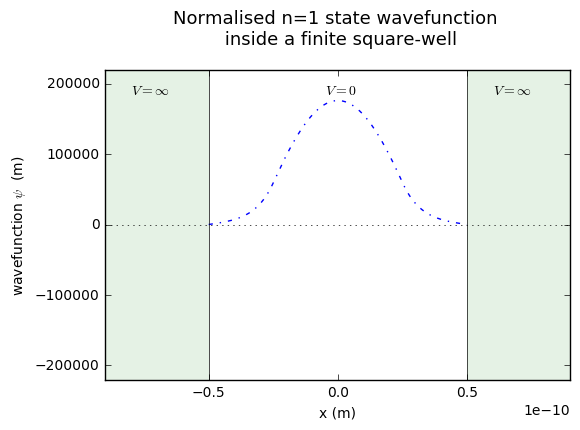

In [33]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_1)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_1)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=1 state wavefunction \n inside a finite square-well" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

This again has a kind of bell-shape curve like shape but this time the wavefunction is steeper near the edges as is expected.

### 3.b n = 2 energy level

In [34]:
#energy guesses
E1_2 = 3.3*10**(-17)
E2_2 = 3.4*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_2 = Secant(E1_2,E2_2,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=2:",E3_2/e,"eV") 

The numerical solution for E at n=2: 355.83842782 eV


(-9e-11, 9e-11)

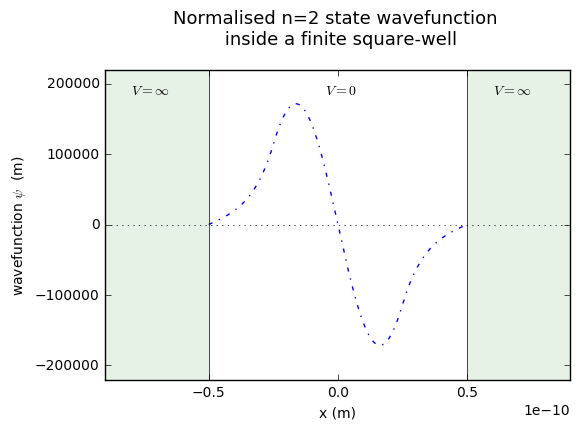

In [35]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_2)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_2)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=2 state wavefunction \n inside a finite square-well" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

### 3.c n = 3 energy level

In [36]:
#energy guesses
E1_3 = 5.3*10**(-17)
E2_3 = 10.3*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_3 = Secant(E1_3,E2_3,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=3:",E3_3/e,"eV") 

The numerical solution for E at n=3: 744.418139951 eV


(-9e-11, 9e-11)

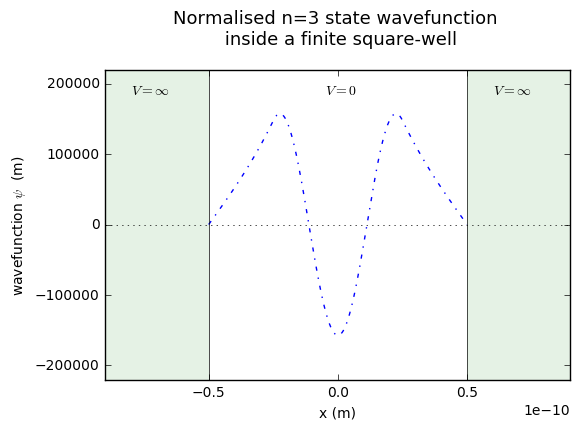

In [37]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_3)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_3)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=3 state wavefunction \n inside a finite square-well" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

### 3.d n = 4 energy level

In [38]:
#energy guesses
E1_4 = 10.3*10**(-17)
E2_4 = 15.3*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_4 = Secant(E1_4,E2_4,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=4:",E3_4/e,"eV") 

The numerical solution for E at n=4: 1117.55200881 eV


(-9e-11, 9e-11)

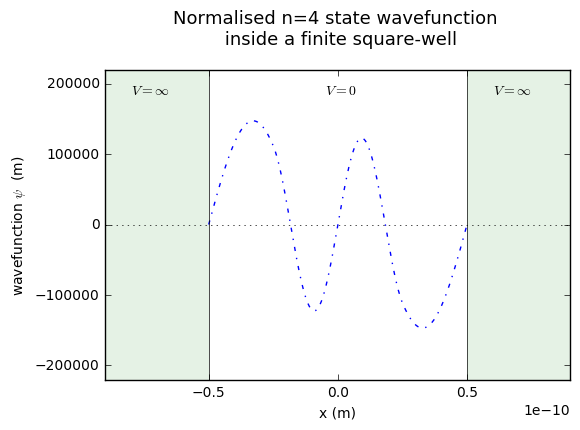

In [39]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_4)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_4)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=4 state wavefunction \n inside a finite square-well" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

The finite square-well also is as expected from previous knowledge. And again we will plot the energy levels and potential in the following graph.

(-9e-11, 9e-11)

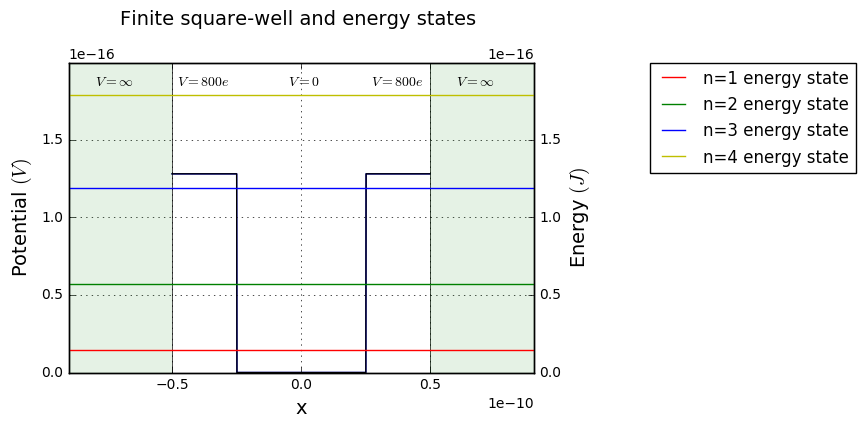

In [40]:
#Before plotting the wavefunction, we need to create a loop to run the harmonic potential function for the xpoints:
V0points=np.zeros(N) #create an array of zeros.

for q in range(0,N): #run loop to calculate the potentials for xpoints. 
    
    V0points[q]=V(xpoints[q])


plt.plot(xpoints,V0points) #Plot the potential within the barriers.

#Draw the barriers :
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

plt.xlabel("x (m)")
plt.ylabel("V (m)")

ax = plt.gca()
ax2 = ax.twinx()
plt.axis('normal')

##Plotting the n=1,2,3 energy eigenstates for the potential system:
ax2.axhline(y=E3_1, c='r', label="n=1 energy state") #Red line represents the energy value of the n=1 state.
ax2.axhline(y=E3_2, c='g', label="n=2 energy state") #Green line represents the energy value of the n=2 state.
ax2.axhline(y=E3_3, c='b', label="n=3 energy state") #Blue line represents the energy value of the n=3 state.
ax2.axhline(y=E3_4, c='y', label="n=4 energy state") #Yellow line represents the energy value of the n=4 state.

ax.plot(xpoints,V0points, 'k', label="Finite square-well") #Plot the potential as a black line.
ax.set_ylabel("Potential $(V)$",fontsize=14)
ax2.set_ylabel("Energy $(J)$",fontsize=14)

ax2.set_ylim(0,2e-16)
ax.set_ylim(0,2e-16)

ax.grid(True)
plt.title("Finite square-well and energy states ", fontsize=14,color='black', y=1.1)
ax.set_xlabel('x', fontsize=14)
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),1.85e-16,'$V = \infty$')
plt.text(-0.5*10**(-11),1.85e-16,'$V = 0$')
plt.text(6*10**(-11),1.85e-16,'$V = \infty$')
plt.text(-4.8*10**(-11),1.85e-16,'$V = 800e$')
plt.text(2.7*10**(-11),1.85e-16,'$V = 800e$')

#x and y graph limits
plt.xlim(-9*10**(-11),9*10**(-11))

# 4. Potential Step

Finally we will also slove the TISE for a potential step which just means two regions, one with zero potential and the other with a finite potential, in our case $800e$.

Below I have defined a function for the potential energy of a potential step.

In [41]:
def V(x):
    '''potential energy function for a potential step'''
    
    #800e potential below x and zero potential above x
    if x < 0.0:
        V0 = 800*e
    else:
        V0 = 0.0
    return V0

### 4.a n = 1 energy level

In [42]:
#energy guesses
E1_1 = 0.0
E2_1 = 1*10**(-19)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_1 = Secant(E1_1,E2_1,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=1:",E3_1/e,"eV") 

The numerical solution for E at n=1: 115.488457842 eV


(-9e-11, 9e-11)

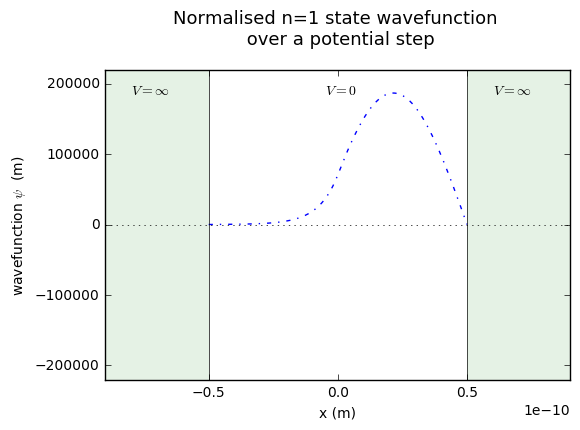

In [43]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_1)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_1)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=1 state wavefunction \n over a potential step" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

As you can see, for the potetnial step, the wavefunction doesnt have enough energy to exist in the $800e$ region (below $x=0$) and so dies off, but it does exist in the zero potential region.

And you can see that below $x=0$ the wavefunction is an exponential, meaning that the particle may tunnel through some of the potential, this phenomena is known as quantum tunnelling.

### 4.b n = 2 energy level

In [44]:
#energy guesses
E1_2 = 6*10**(-17)
E2_2 = 7*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_2 = Secant(E1_2,E2_2,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=2:",E3_2/e,"eV") 

The numerical solution for E at n=2: 450.433412765 eV


(-9e-11, 9e-11)

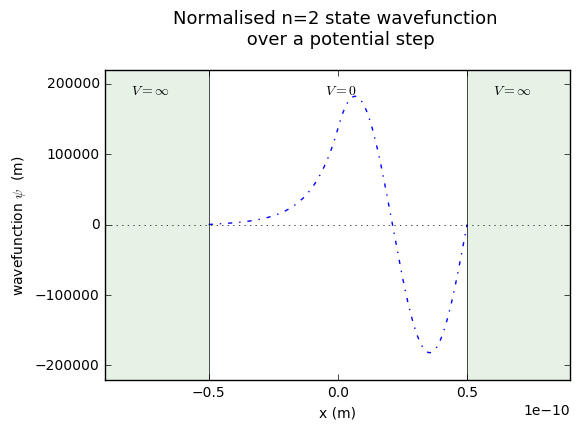

In [45]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_2)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_2)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=2 state wavefunction \n over a potential step" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

### 4.c n = 3 energy level

In [46]:
#energy guesses
E1_3 = 11*10**(-17)
E2_3 = 12*10**(-17)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_3 = Secant(E1_3,E2_3,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=3:",E3_3/e,"eV") 

The numerical solution for E at n=3: 879.899560112 eV


(-9e-11, 9e-11)

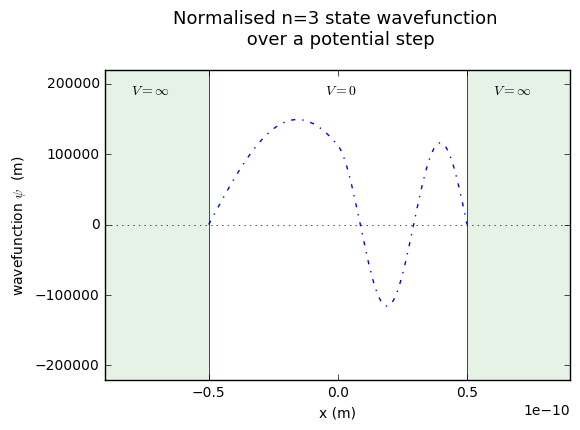

In [47]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_3)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_3)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=3 state wavefunction \n over a potential step" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

For the $n=3$ energy state the wavefunction now has a higher energy $(\approx 880 eV)$ compared to the potential step $(800 eV)$. Therefore now, the wavefuntion is now sinusoidal over the potential step whereas it was exponential before.

### 4.d n = 4 energy level

In [48]:
#energy guesses
E1_4 = 1.75*10**(-16)
E2_4 = 1.80*10**(-16)

tolerance = e/1000

#calculates value for energy for above defined tolerance
E3_4 = Secant(E1_4,E2_4,tolerance)

#prints energy values for numerical solution in eV.
print("The numerical solution for E at n=4:",E3_4/e,"eV") 

The numerical solution for E at n=4: 1041.20611011 eV


(-9e-11, 9e-11)

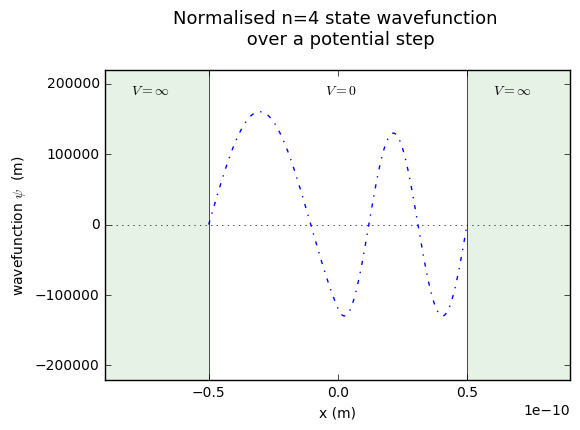

In [49]:
#extract psi values and integrate
psi_sq = RungeKutta2d([psi0,phi0],xpoints,E3_4)[0]**2
I = h*(0.5*(psi_sq[0]+psi_sq[N])+np.sum(psi_sq[1:N-1]))

#x and y points of numerical solution for psi
xplotpoints = np.arange(-a, a+h, h) # array with same properties as xpoints but includes end point
bestsoln = RungeKutta2d([psi0, phi0],xpoints,E3_4)/np.sqrt(I) #normalised by dividing by square root of I

# plots wavefunction with new xplotpoints array
plt.plot(xplotpoints,bestsoln[0],'b-.',label="Numerically calculated plot")

# draw black dotted line at y = 0
plt.axhline(c="k",ls=":", lw=0.5)          

#labels and titles
plt.xlabel("x (m)") 
plt.ylabel("wavefunction $\psi$  (m)")
plt.title("Normalised n=4 state wavefunction \n over a potential step" ,fontsize = 13, y=1.06)

#draws two vertical lines at -a and a to represent divide in potential regions
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),185000,'$V = \infty$')
plt.text(-0.5*10**(-11),185000,'$V = 0$')
plt.text(6*10**(-11),185000,'$V = \infty$')

#x and y graph limits
plt.ylim(-220000,220000)
plt.xlim(-9*10**(-11),9*10**(-11))

Once again the wavefunction has more energy than the potential step and so is now sinusoidal in that region.

(-9e-11, 9e-11)

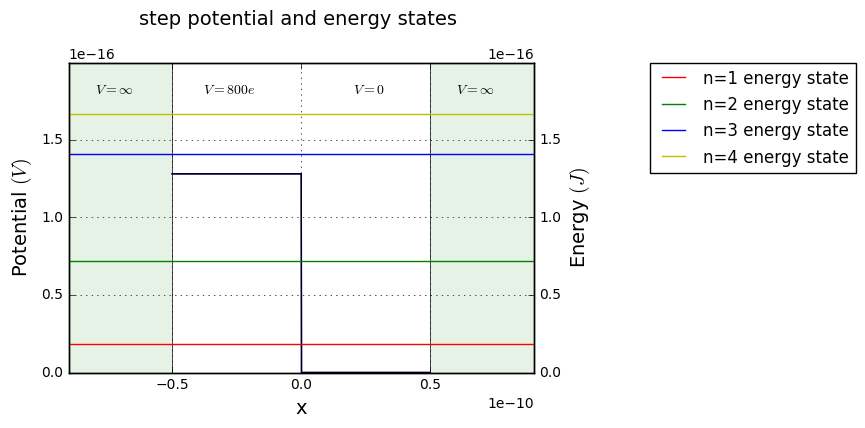

In [50]:
#Before plotting the wavefunction, we need to create a loop to run the harmonic potential function for the xpoints:
V0points=np.zeros(N) #create an array of zeros.

for q in range(0,N): #run loop to calculate the potentials for xpoints. 
    
    V0points[q]=V(xpoints[q])


plt.plot(xpoints,V0points) #Plot the potential within the barriers.

#Draw the barriers :
plt.axvline(x=-a,c='k' ,lw=0.5)
plt.axvline(x=a,c='k' ,lw=0.5)

plt.xlabel("x (m)")
plt.ylabel("V (m)")

ax = plt.gca()
ax2 = ax.twinx()
plt.axis('normal')

##Plotting the n=1,2,3 energy eigenstates for the potential system:
ax2.axhline(y=E3_1, c='r', label="n=1 energy state") #Red line represents the energy value of the n=1 state.
ax2.axhline(y=E3_2, c='g', label="n=2 energy state") #Green line represents the energy value of the n=2 state.
ax2.axhline(y=E3_3, c='b', label="n=3 energy state") #Blue line represents the energy value of the n=3 state.
ax2.axhline(y=E3_4, c='y', label="n=4 energy state") #Yellow line represents the energy value of the n=4 state.

ax.plot(xpoints,V0points, 'k', label="step potential") #Plot the potential as a black line.
ax.set_ylabel("Potential $(V)$",fontsize=14)
ax2.set_ylabel("Energy $(J)$",fontsize=14)

ax2.set_ylim(0,2e-16)
ax.set_ylim(0,2e-16)

ax.grid(True)
plt.title("step potential and energy states ", fontsize=14,color='black', y=1.1)
ax.set_xlabel('x', fontsize=14)
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)

#shades V=infinity regions in light green
plt.axvspan(-9*10**(-11), -a, color='g', alpha=0.1, lw=0, label="potential")
plt.axvspan(a, 9*10**(-11), color='g', alpha=0.1, lw=0)

#annotations
plt.text(-8*10**(-11),1.8e-16,'$V = \infty$')
plt.text(2*10**(-11),1.8e-16,'$V = 0$')
plt.text(6*10**(-11),1.8e-16,'$V = \infty$')
plt.text(-3.8*10**(-11),1.8e-16,'$V = 800e$')

#x and y graph limits
plt.xlim(-9*10**(-11),9*10**(-11))

This scenario had two energy levels which exceeded the potential step energy and two that did not, as you can see from the abobe graph.

# Conclusion

In conclusion we have solved the TISE for energy states $n = 1,2,3$ and $4$ for an infinite potential well, finite potential well, harmonic potential and a potential step. And for all of this the Runge-Kutta method combined with the Secant method has been efficient and accurate.